#### Importando as bibliotécas necessárias

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

#### Fazendo a leitura do arquivo CSV onde irei realizar a análise

In [2]:
bitcoin = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Transformando o Timestamp em Data

In [4]:
data = []
for i in range(len(bitcoin)):
    data.append(datetime.fromtimestamp(bitcoin['Timestamp'][i]))

#### Adicionando a coluna Data no DataFrame criado

In [5]:
bitcoin['Data'] = data

In [6]:
# Verificando se foi criado e se o Dtype é datetime64
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          int64         
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   Data               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 314.0 MB


In [7]:
# Colocando a coluna Data como Index
bitcoin.set_index('Data', inplace = True)

#### Verificando a lista completa

In [10]:
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Data,,,,,,,,
2011-12-31 04:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 04:53:00,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 04:54:00,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 04:55:00,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 04:56:00,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-09-13 20:56:00,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
2020-09-13 20:57:00,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
2020-09-13 20:58:00,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283


In [11]:
# Aqui é possível alterar a data de visualização colocando as datas desejadas
# Adicione uma data de início como no exemplo abaixo:
data_de_inicio = '2019-05-17 22:20:00'

# Adicione uma data final como no exemplo abaixo:
data_de_fim = '2019-05-18 01:59:00'

# Nota: Você pode adicionar apenas as datas sem colocar as horas, minutos e segundos.

In [12]:
# Criei um novo DataFrame para visualizar o período desejado
new_df = pd.DataFrame()
new_df = bitcoin.loc[data_de_inicio : data_de_fim]

#### Visualizando o período desejado em um gráfico de Candlestick
##### Nota 1: Abaixo do gráfico é possível expandir e retrair para obter uma melhor visualização de um período específico.
##### Nota 2: Ao posicionar o mouse em cima de um Clandlestick você tem os dados de abertura, fechamento, máxima e mínima

In [14]:
figure = go.Figure(
    data = [
        go.Candlestick(
            x = new_df.index,
            low = new_df['Low'],
            high = new_df['High'],
            close = new_df['Close'],
            open = new_df['Open'],
            increasing_line_color = 'green',
            decreasing_line_color = 'red'
        )
    ]
)

figure.update_layout(
    title = 'Bitcoin - USD_1-min_data_2012-01-01_to_2020-09-14',
    yaxis_title = 'Bitcoin Price USD',
    xaxis_title = 'Date / Time'
)

figure.show()

#### Criando um DataFrame para mostrar os indicadores nos períodos solicitados pelo usuário e facilitar exportar em CSV mais a frente.

In [15]:
indicadores = pd.DataFrame()
indicadores['Timestamp'] = new_df['Timestamp']
indicadores['Fechamento'] = new_df['Close']

#### Adicionando as Bandas de Bollinger 

In [17]:
# Média Móvel Simples utilizada como padrão para criar a banda superior e inferior
indicadores['MMS de 20 dias'] = new_df['Close'].rolling(window=20).mean()

# Banda de Bollinger Superior = Média Móvel Simples (20 dias) + (2 x Desvio Padrão de 20 dias)
indicadores['BB Superior'] = indicadores['MMS de 20 dias'] + 2 * (new_df['Close'].rolling(window=20).std())

# Banda de Bollinger Inferior = Média Móvel Simples (20 dias) - (2 x Desvio Padrão de 20 dias)
indicadores['BB Inferior'] = indicadores['MMS de 20 dias'] - 2 * (new_df['Close'].rolling(window=20).std())

In [18]:
# Verificando o .head() pra ver se está da maneira desejada
indicadores.head()

,Timestamp,Fechamento,MMS de 20 dias,BB Superior,BB Inferior
Data,,,,,
2019-05-17 22:20:00,1558142400,7323.26,NaN,NaN,NaN
2019-05-17 22:21:00,1558142460,7327.99,NaN,NaN,NaN
2019-05-17 22:22:00,1558142520,7319.33,NaN,NaN,NaN
2019-05-17 22:23:00,1558142580,7314.17,NaN,NaN,NaN
2019-05-17 22:24:00,1558142640,7326.88,NaN,NaN,NaN


<AxesSubplot:xlabel='Data'>

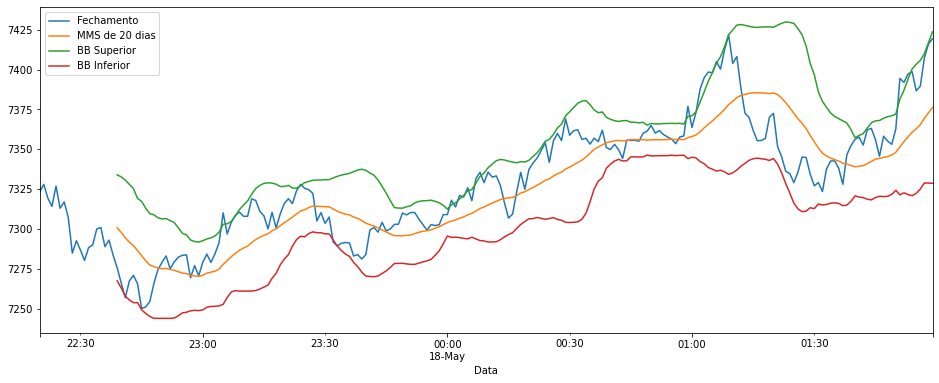

In [20]:
# Criando o gráfico das Bandas de Bollinger
indicadores[['Fechamento', 'MMS de 20 dias', 'BB Superior', 'BB Inferior']].plot(figsize=(16,6))

#### Adicionando o Índice de Força Relativa (IFR)

In [21]:
# Calculando a diferença de preço com o período anterior eliminando os períodos onde o valor atribuído seja NaN

delta = indicadores['Fechamento'].diff(1)
delta = delta.dropna()
delta

Data
2019-05-17 22:21:00     4.73
2019-05-17 22:22:00    -8.66
2019-05-17 22:23:00    -5.16
2019-05-17 22:24:00    12.71
2019-05-17 22:25:00   -13.89
                       ...  
2019-05-18 01:55:00   -11.99
2019-05-18 01:56:00     2.80
2019-05-18 01:57:00    17.81
2019-05-18 01:58:00     8.74
2019-05-18 01:59:00     3.34
Name: Fechamento, Length: 219, dtype: float64

In [22]:
# Selecionando os valores de alta e de baixa.

# Eliminando valores negativos na representação de alta
alta = delta.copy()
alta[alta < 0] = 0

# Eliminando valores positivos na representação de baixa
baixa = delta.copy()
baixa[baixa > 0] = 0

In [23]:
# Selecionando o período
periodo = 14

# Calculando a média de ganho e de perda
ganho_medio = alta.rolling(window = periodo).mean()
perda_media = abs(baixa.rolling(window = periodo).mean()) # Utilizei o abs() por causa dos valores negativos 

In [24]:
# Calculando a Força Relativa
FR = ganho_medio / perda_media

# Calculando o Índice de Força Relativa (IFR)
IFR = 100 - (100 / (1 + FR))

In [25]:
indicadores['IFR'] = IFR
indicadores.head()

,Timestamp,Fechamento,MMS de 20 dias,BB Superior,BB Inferior,IFR
Data,,,,,,
2019-05-17 22:20:00,1558142400,7323.26,NaN,NaN,NaN,NaN
2019-05-17 22:21:00,1558142460,7327.99,NaN,NaN,NaN,NaN
2019-05-17 22:22:00,1558142520,7319.33,NaN,NaN,NaN,NaN
2019-05-17 22:23:00,1558142580,7314.17,NaN,NaN,NaN,NaN
2019-05-17 22:24:00,1558142640,7326.88,NaN,NaN,NaN,NaN


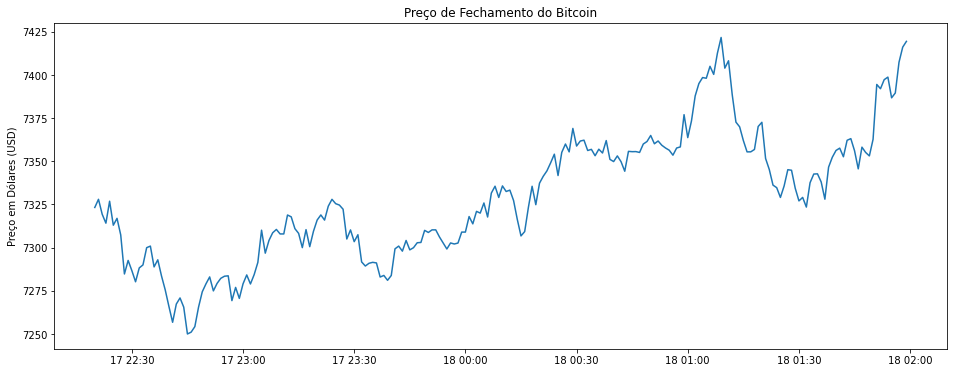

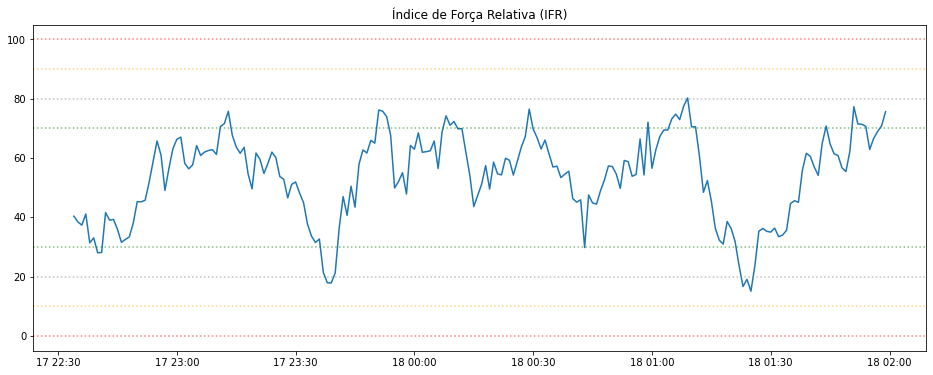

In [26]:
# Criando um plot simples do preço de fechamento do Bitcoin no período determinado
plt.figure(figsize=(16,6))
plt.plot(indicadores['Fechamento'])
plt.title('Preço de Fechamento do Bitcoin')
plt.ylabel('Preço em Dólares (USD)')

# Criando o plot do IFR
plt.figure(figsize=(16,6))
plt.title('Índice de Força Relativa (IFR)')
plt.plot(indicadores['IFR'])
plt.axhline(0, linestyle = ':', alpha = 0.5, color = 'red')
plt.axhline(10, linestyle = ':', alpha = 0.5, color = 'orange')
plt.axhline(20, linestyle = ':', alpha = 0.5, color = 'gray')
plt.axhline(30, linestyle = ':', alpha = 0.5, color = 'green')
plt.axhline(70, linestyle = ':', alpha = 0.5, color = 'green')
plt.axhline(80, linestyle = ':', alpha = 0.5, color = 'gray')
plt.axhline(90, linestyle = ':', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = ':', alpha = 0.5, color = 'red')